# Figure 2e. Statistical power and False Discovery Rate (FDR) comparisons.

Statistical power and FDR comparison of *ColocBoost* with OPERA for GWAS colocalization, evaluated at the gene level (Methods). 

In [2]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
result <- readRDS("data/Figure_2e.rds")
result$method <- factor(result$method, levels = c("ColocBoost", "OPERA"))
colors_man <- c("#B24745FF", "#1d4a9e")

## Statistical power

In [3]:
p1 <- result %>% 
  ggplot(aes(x = as.factor(phi), y = power, fill = method)) +
  facet_wrap( ~ trait, labeller = labeller(trait = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05)  +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Per-SNP Heritability of Target Phenotype", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 16, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 16, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

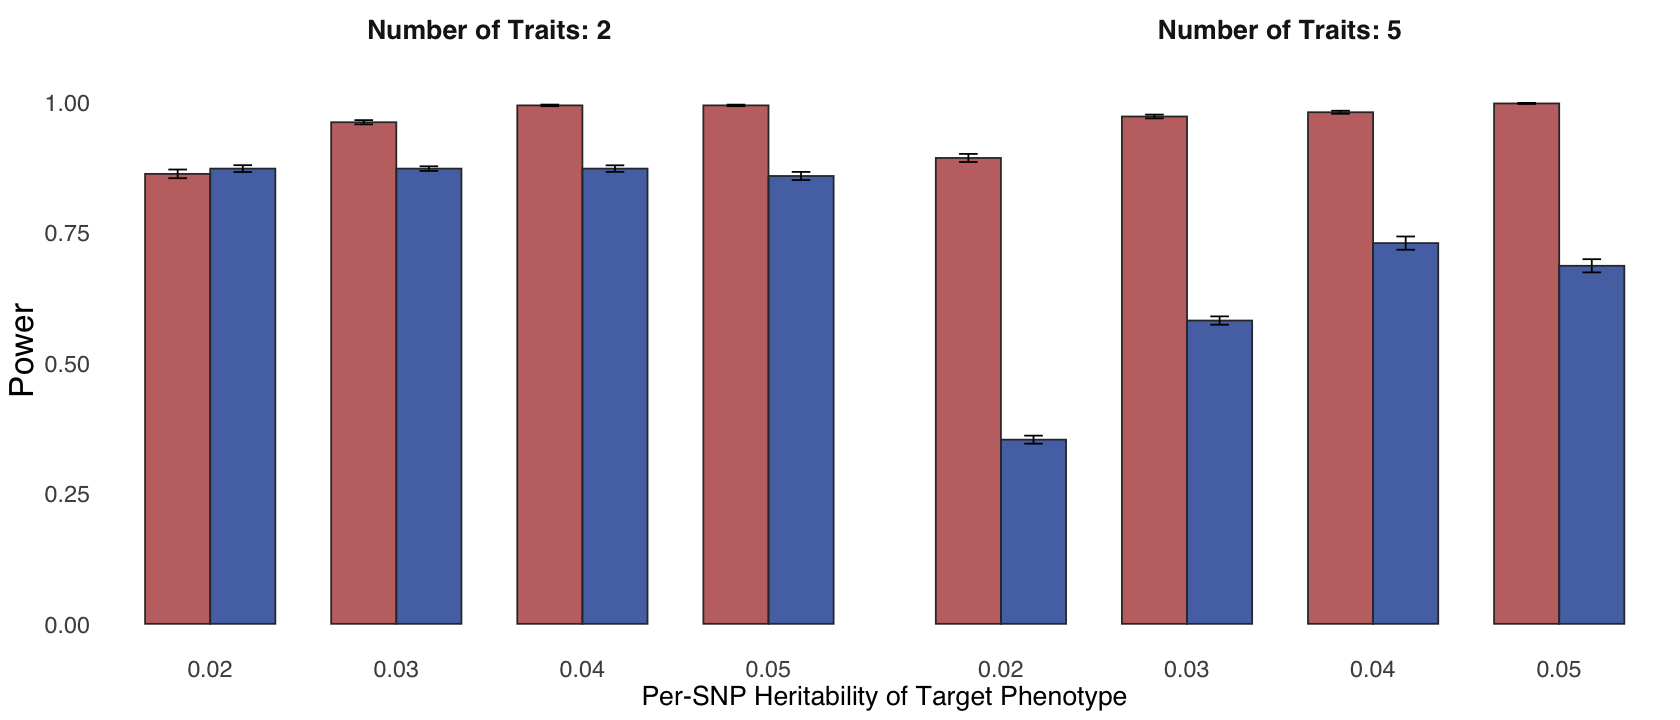

In [5]:
options(repr.plot.width = 14, repr.plot.height = 6)
p1

## FDR

In [6]:
p2 <- result %>% 
  ggplot(aes(x = as.factor(phi), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  facet_wrap( ~ trait, labeller = labeller(trait = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  ylim(0, 0.2) +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  labs(x = "Per-SNP Heritability of Target Phenotype", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  theme(legend.position = "bottom",
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 16, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 16, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

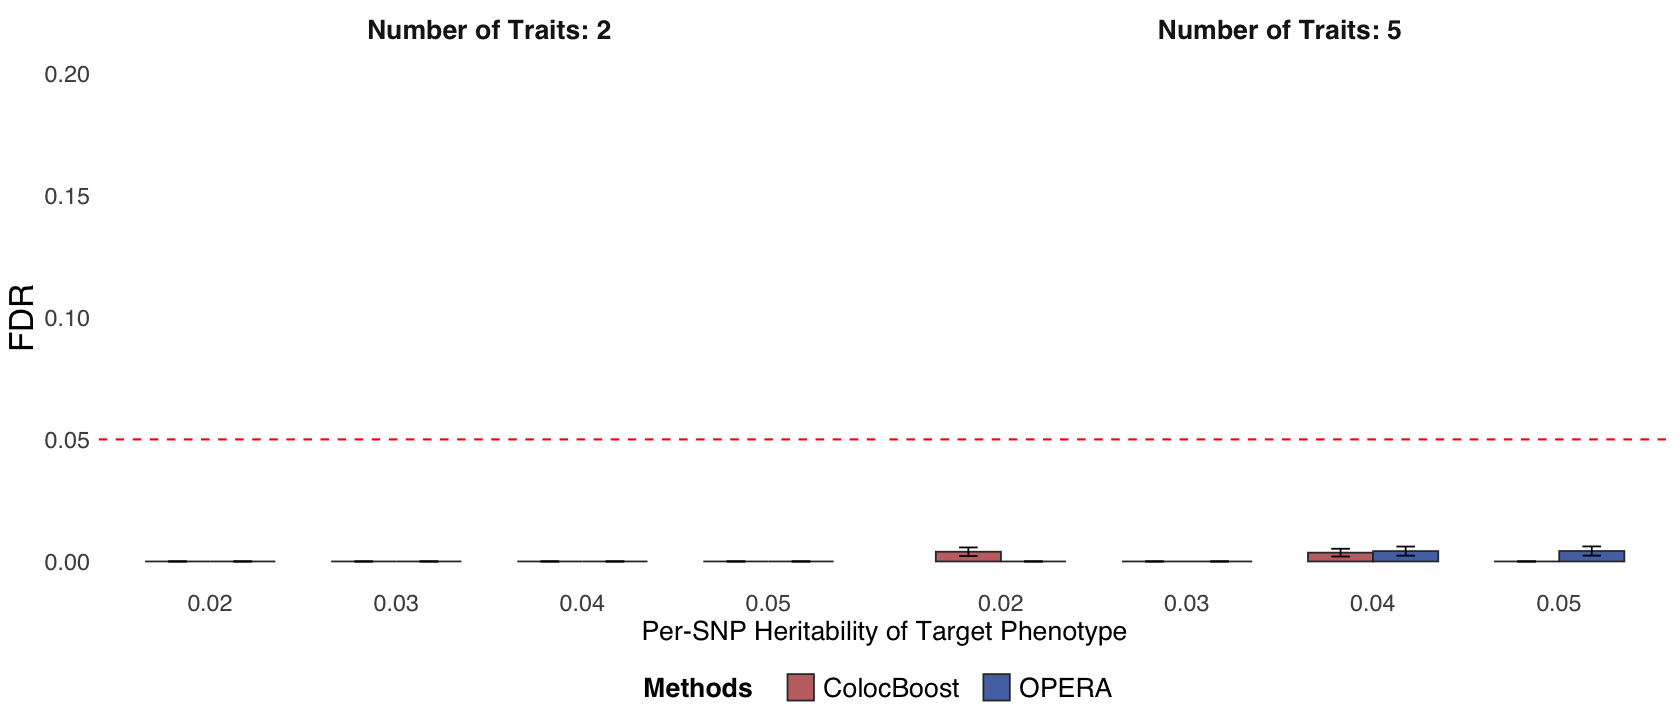

In [7]:
options(repr.plot.width = 14, repr.plot.height = 6)
p2